<a href="https://colab.research.google.com/github/Benyormin/fantasy-football-solver/blob/main/fantasy_football_solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.colors as mcolors


In [ ]:
budget = 83.5
num_players = 11

In [ ]:
df = pd.read_csv('/content/players (1).csv')
df.head()

,id,name,now_cost,position,team,starts,penalties_missed,own_goals,ep_next,influence,...,saves_per_90,selected_by_percent,expected_goals_conceded,creativity_rank,cost_change_event_fall,points_per_game,assists,starts_per_90,threat_rank_type,ict_index_rank
0,1,Fábio Ferreira Vieira,54,MID,Arsenal,0,0,0,0.0,0.0,...,0.0,0.0,0.00,689,0,0.0,0,0.00,311,690
1,2,Gabriel Fernando de Jesus,68,FWD,Arsenal,2,0,0,1.8,26.6,...,0.0,0.9,2.44,236,0,0.8,0,0.68,33,297
2,3,Gabriel dos Santos Magalhães,61,DEF,Arsenal,14,0,0,5.8,340.0,...,0.0,23.0,12.59,202,1,4.9,1,1.07,3,81
3,4,Kai Havertz,79,FWD,Arsenal,15,0,0,4.0,287.8,...,0.0,10.1,13.94,94,0,4.1,2,1.01,5,26
4,5,Karl Hein,40,GKP,Arsenal,0,0,0,0.0,0.0,...,0.0,0.0,0.00,498,0,0.0,0,0.00,29,518


## cleaning


In [ ]:
df.isnull().sum()

,0
id,0
name,0
now_cost,0
position,0
team,0
...,...
points_per_game,0
assists,0
starts_per_90,0
threat_rank_type,0


In [ ]:
df['news'].isnull().sum()

487

In [ ]:
# Fill missing values with appropriate strategies
df['direct_freekicks_order'] = df['direct_freekicks_order'].fillna(0)
df['chance_of_playing_this_round']= df['chance_of_playing_this_round'].fillna(0)
df['chance_of_playing_next_round']= df['chance_of_playing_next_round'].fillna(0)
df['penalties_order'] = df['penalties_order'].fillna(0)
df['corners_and_indirect_freekicks_order'] = df['corners_and_indirect_freekicks_order'].fillna(0)
df['news_added'] = df['news_added'].fillna('No News')
df['news']= df['news'].fillna('No News')

In [ ]:
#change cost now to decimal
df['now_cost'] = df['now_cost'] /10

In [ ]:
df.describe()

,id,now_cost,starts,penalties_missed,own_goals,ep_next,influence,total_points,creativity_rank_type,expected_goals_conceded_per_90,...,saves_per_90,selected_by_percent,expected_goals_conceded,creativity_rank,cost_change_event_fall,points_per_game,assists,starts_per_90,threat_rank_type,ict_index_rank
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,...,700.000000,700.000000,700.000000,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.00000
mean,350.50000,4.914571,4.965714,0.008571,0.020000,1.118286,103.911429,18.248571,119.671429,1.212114,...,0.178043,2.138286,7.410814,350.50000,0.000000,1.572429,0.608571,0.591514,119.671429,350.50000
std,202.21688,1.046112,5.674678,0.092250,0.159218,1.747512,128.402175,22.571481,87.236334,2.562359,...,0.820640,5.896321,8.335760,202.21688,0.169152,1.530986,1.251465,0.556020,87.236334,202.21688
min,1.00000,3.900000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.00000,-1.000000,0.000000,0.000000,0.000000,1.000000,1.00000
25%,175.75000,4.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,...,0.000000,0.000000,0.000000,175.75000,0.000000,0.000000,0.000000,0.000000,44.000000,175.75000
50%,350.50000,4.600000,2.000000,0.000000,0.000000,0.400000,45.200000,9.500000,101.500000,1.210000,...,0.000000,0.200000,4.040000,350.50000,0.000000,1.300000,0.000000,0.850000,101.500000,350.50000
75%,525.25000,5.100000,10.000000,0.000000,0.000000,1.800000,183.050000,31.250000,189.000000,1.690000,...,0.000000,1.400000,13.790000,525.25000,0.000000,2.500000,1.000000,1.020000,189.000000,525.25000
max,700.00000,14.900000,16.000000,1.000000,2.000000,12.700000,700.600000,156.000000,318.000000,60.300000,...,8.180000,63.300000,35.130000,700.00000,1.000000,10.400000,11.000000,6.430000,318.000000,700.00000


# find correlations

## FWD

In [ ]:
forwards = df[df['position']=='FWD']
forwards.head()

,id,name,now_cost,position,team,starts,penalties_missed,own_goals,ep_next,influence,...,saves_per_90,selected_by_percent,expected_goals_conceded,creativity_rank,cost_change_event_fall,points_per_game,assists,starts_per_90,threat_rank_type,ict_index_rank
1,2,Gabriel Fernando de Jesus,6.8,FWD,Arsenal,2,0,0,1.8,26.6,...,0.0,0.9,2.44,236,0,0.8,0,0.68,33,297
3,4,Kai Havertz,7.9,FWD,Arsenal,15,0,0,4.0,287.8,...,0.0,10.1,13.94,94,0,4.1,2,1.01,5,26
32,665,Nathan Butler-Oyedeji,4.5,FWD,Arsenal,0,0,0,1.0,0.0,...,0.0,0.2,0.00,594,0,0.0,0,0.00,51,600
43,38,Jhon Durán,5.8,FWD,Aston Villa,2,0,0,2.0,229.8,...,0.0,3.0,8.17,239,0,2.9,0,0.38,17,100
63,58,Ollie Watkins,8.9,FWD,Aston Villa,14,0,0,3.6,324.8,...,0.0,18.3,14.02,120,1,4.9,3,1.12,3,19


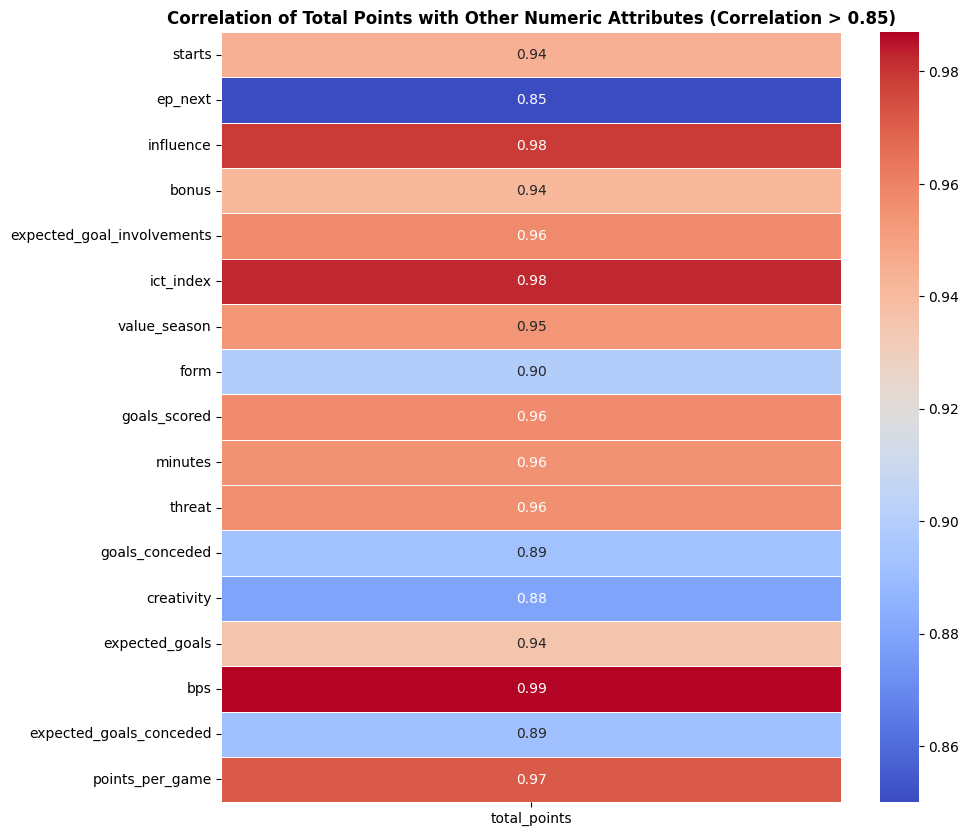

In [ ]:
numeric_forwards = forwards.select_dtypes(include=['float64', 'int64'])
#calclulate correlation total points with others
corr_matrix_fwd = numeric_forwards.corr()['total_points'].drop('total_points').to_frame()
# Filter the correlation matrix to keep only those correlations above 0.85 (absolute value)
filtered_correlation_matrix_fwd = corr_matrix_fwd[corr_matrix_fwd['total_points'] > 0.85]

#plot
plt.figure(figsize=(10, 10))
sns.heatmap(filtered_correlation_matrix_fwd, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation of Total Points with Other Numeric Attributes (Correlation > 0.85)', fontweight='bold')
plt.show()


In [ ]:

filtered_correlation_matrix_fwd

,total_points
starts,0.944478
ep_next,0.850005
influence,0.978460
bonus,0.941146
expected_goal_involvements,0.957989
ict_index,0.982209
value_season,0.953845
form,0.899510
goals_scored,0.957428
minutes,0.955009


In [ ]:

important_features_fwd = [ 'name', 'id', 'total_points', 'expected_goals', 'expected_goal_involvements',
'threat',
'starts',
'goals_conceded',
'expected_goals_conceded',
'minutes',
'points_per_game',
'creativity',
'goals_scored',
'influence',
'bps',
'value_season',
'ict_index',
'transfers_in',
'bonus']

In [ ]:
fwd_features = forwards[important_features_fwd]
fwd_features.head()

,name,id,total_points,expected_goals,expected_goal_involvements,threat,starts,goals_conceded,expected_goals_conceded,minutes,points_per_game,creativity,goals_scored,influence,bps,value_season,ict_index,transfers_in,bonus
1,Gabriel Fernando de Jesus,2,10,1.02,1.16,95.0,2,2,2.44,264,0.8,64.5,0,26.6,36,1.5,18.3,63887,0
3,Kai Havertz,4,61,5.81,7.06,460.0,15,15,13.94,1333,4.1,186.0,5,287.8,216,7.7,93.4,2207891,7
32,Nathan Butler-Oyedeji,665,0,0.00,0.00,0.0,0,0,0.00,0,0.0,0.0,0,0.0,0,0.0,0.0,40860,0
43,Jhon Durán,38,46,4.08,4.30,276.0,2,10,8.17,478,2.9,62.8,6,229.8,193,7.9,57.0,1022934,8
63,Ollie Watkins,58,78,8.42,9.50,580.0,14,20,14.02,1125,4.9,161.8,7,324.8,272,8.8,105.5,2580716,11


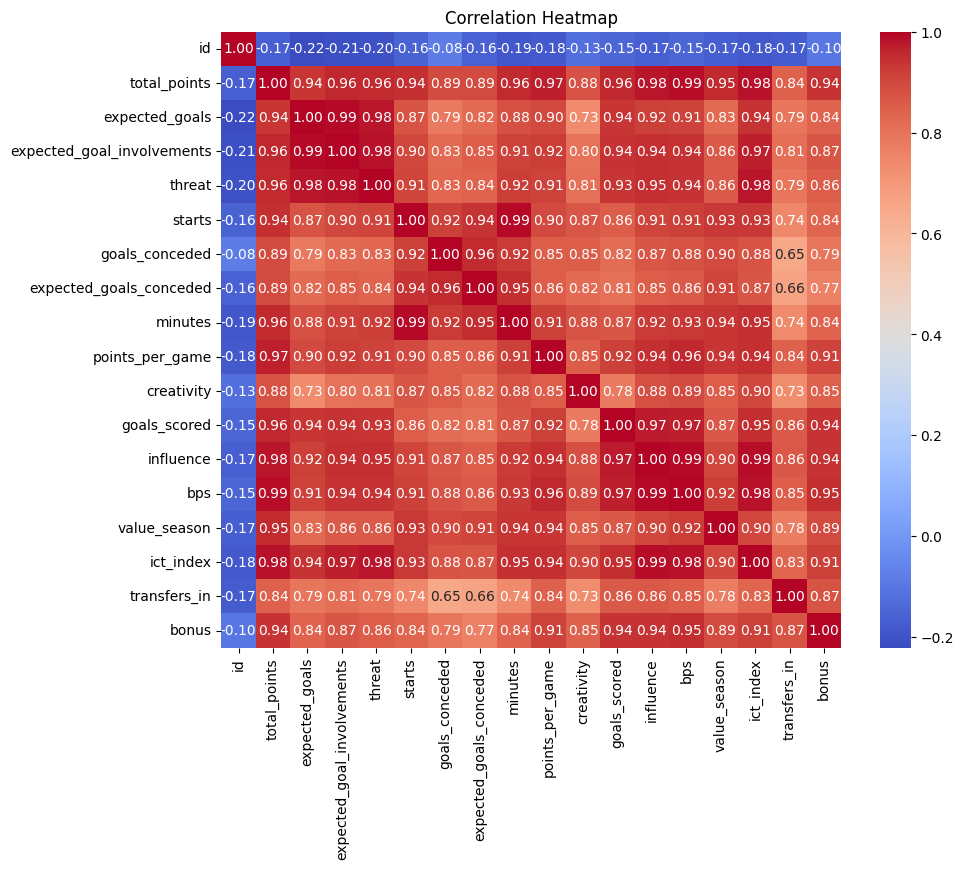

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

X = fwd_features.drop('name',axis=1)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:

columns = ['ict_index','influence','expected_goals_conceded','expected_goals','starts','threat']
X.drop(columns, inplace=True, axis=1)

In [ ]:

X = X.drop('id', axis =1)
X = X.drop('total_points', axis=1)
X.head()

,expected_goal_involvements,goals_conceded,minutes,points_per_game,creativity,goals_scored,bps,value_season,transfers_in,bonus
1,1.16,2,264,0.8,64.5,0,36,1.5,63887,0
3,7.06,15,1333,4.1,186.0,5,216,7.7,2207891,7
32,0.00,0,0,0.0,0.0,0,0,0.0,40860,0
43,4.30,10,478,2.9,62.8,6,193,7.9,1022934,8
63,9.50,20,1125,4.9,161.8,7,272,8.8,2580716,11


In [ ]:
features = X.columns
features

Index(['expected_goal_involvements', 'goals_conceded', 'minutes',
       'points_per_game', 'creativity', 'goals_scored', 'bps', 'value_season',
       'transfers_in', 'bonus'],
      dtype='object')

### Linear regression


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


#X
Y = fwd_features['total_points']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=11)

# Preprocess the data (Standardizing the features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Get the formula with coefficients (same as before)
coefficients = model.coef_
formula = f"total_points = {model.intercept_:.4f} "
for i, feature in enumerate(features):
    formula += f"+ ({coefficients[i]:.4f} * {feature}) "
print("\nFormula:", formula)


Mean Squared Error (MSE): 4.8541
R-squared (R²): 0.9938

Formula: total_points = 0.1365 + (1.8314 * expected_goal_involvements) + (-0.0191 * goals_conceded) + (0.0089 * minutes) + (1.3662 * points_per_game) + (0.0223 * creativity) + (1.4620 * goals_scored) + (0.0438 * bps) + (1.2573 * value_season) + (-0.0000 * transfers_in) + (0.4593 * bonus) 


In [ ]:
forwards["score"] = (
    0.1214 +
    (0.9781 * forwards["expected_goal_involvements"]) +
    (-0.2734 * forwards["goals_conceded"]) +
    (0.0109 * forwards["minutes"]) +
    (1.2638 * forwards["points_per_game"]) +
    (0.0424 * forwards["creativity"]) +
    (3.6162 * forwards["goals_scored"]) +
    (0.0199 * forwards["bps"]) +
    (2.0042 * forwards["value_season"]) +
    (-0.0000 * forwards["transfers_in"]) +
    (-0.4946 * forwards["bonus"])
)


<ipython-input-105-8bedbb2d6a13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forwards["score"] = (


In [ ]:
forwards= forwards.sort_values('score',ascending=False)
forwards.head()

,id,name,now_cost,position,team,starts,penalties_missed,own_goals,ep_next,influence,...,selected_by_percent,expected_goals_conceded,creativity_rank,cost_change_event_fall,points_per_game,assists,starts_per_90,threat_rank_type,ict_index_rank,score
432,351,Erling Haaland,14.9,FWD,Man City,16,0,0,4.6,533.4,...,38.6,23.55,127,0,6.2,1,1.00,1,4,99.272766
669,541,Matheus Santos Carneiro Da Cunha,7.1,FWD,Wolves,15,0,0,6.0,481.2,...,24.3,25.05,15,0,5.6,3,1.01,6,5,89.205232
544,447,Chris Wood,6.6,FWD,Nott'm Forest,15,0,0,4.4,373.2,...,23.9,14.14,173,0,5.6,0,1.09,7,28,87.589754
211,180,Nicolas Jackson,8.2,FWD,Chelsea,15,0,0,6.1,419.4,...,28.4,17.41,95,0,5.9,4,1.14,2,10,87.236665
496,401,Alexander Isak,8.7,FWD,Newcastle,14,0,0,6.6,379.2,...,26.5,16.94,47,-1,5.7,4,1.12,4,16,77.702201


## Mid

In [ ]:
mid = df[df['position']=='MID']
mid.head()

,id,name,now_cost,position,team,starts,penalties_missed,own_goals,ep_next,influence,...,saves_per_90,selected_by_percent,expected_goals_conceded,creativity_rank,cost_change_event_fall,points_per_game,assists,starts_per_90,threat_rank_type,ict_index_rank
0,1,Fábio Ferreira Vieira,5.4,MID,Arsenal,0,0,0,0.0,0.0,...,0.0,0.0,0.00,689,0,0.0,0,0.00,311,690
6,7,Jorge Luiz Frello Filho,4.7,MID,Arsenal,5,0,0,2.2,30.8,...,0.0,0.2,2.92,268,0,1.2,0,1.15,204,357
8,9,Gabriel Martinelli Silva,6.7,MID,Arsenal,10,0,0,2.2,218.4,...,0.0,2.5,8.87,84,0,3.8,2,1.06,19,55
9,12,Ethan Nwaneri,4.5,MID,Arsenal,0,0,0,2.8,53.2,...,0.0,0.4,0.71,301,0,1.6,0,0.00,143,327
10,13,Martin Ødegaard,8.3,MID,Arsenal,9,0,0,5.4,172.2,...,0.0,6.0,5.75,40,0,4.0,2,1.12,64,84


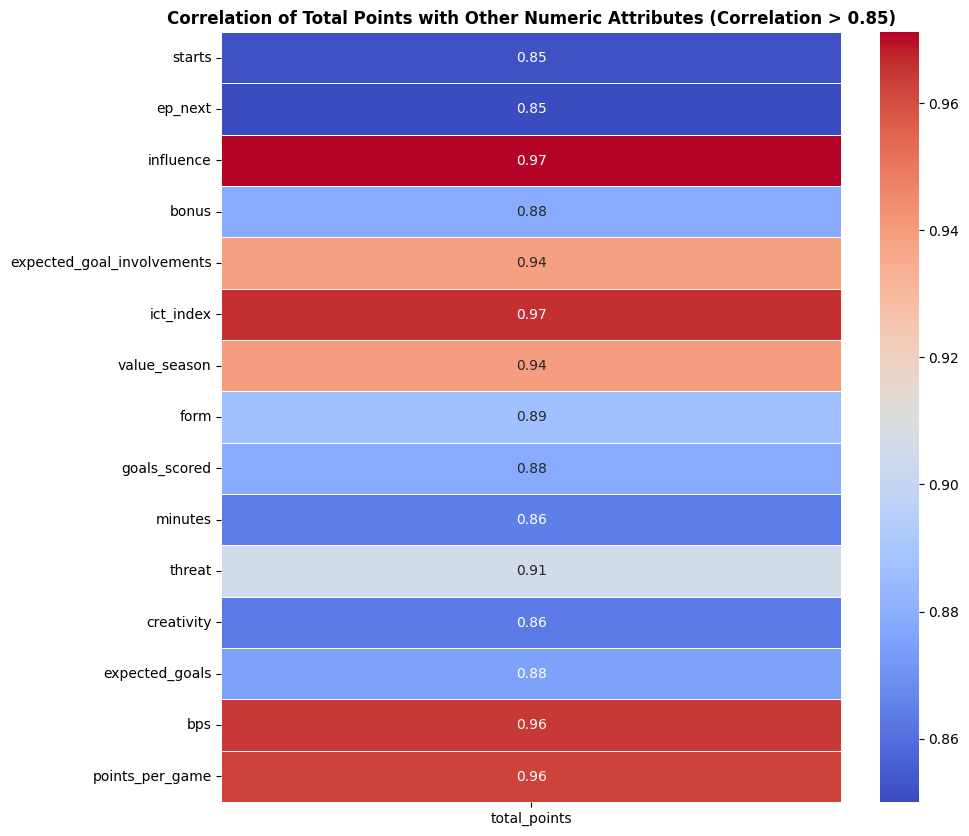

In [ ]:
numeric_mid = mid.select_dtypes(include=['float64', 'int64'])
#calclulate correlation total points with others
corr_matrix_mid = numeric_mid.corr()['total_points'].drop('total_points').to_frame()
# Filter the correlation matrix to keep only those correlations above 0.85 (absolute value)
filtered_correlation_matrix_mid = corr_matrix_mid[corr_matrix_mid['total_points'] > 0.85]

#plot
plt.figure(figsize=(10, 10))
sns.heatmap(filtered_correlation_matrix_mid, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation of Total Points with Other Numeric Attributes (Correlation > 0.85)', fontweight='bold')
plt.show()

In [ ]:
filtered_correlation_matrix_mid

,total_points
starts,0.851754
ep_next,0.850025
influence,0.971144
bonus,0.878596
expected_goal_involvements,0.938795
ict_index,0.965556
value_season,0.939900
form,0.887243
goals_scored,0.878711
minutes,0.864556


In [ ]:
important_features_mid =['expected_goal_involvements',
'threat',
'starts',
'minutes',
'points_per_game',
'goals_scored',
'influence',
'bps',
'value_season',
'ict_index',
'bonus']


In [ ]:
mid_features = mid[important_features_mid]
mid_features.head()

,expected_goal_involvements,threat,starts,minutes,points_per_game,goals_scored,influence,bps,value_season,ict_index,bonus
0,0.00,0.0,0,0,0.0,0,0.0,0,0.0,0.0,0
6,0.35,3.0,5,391,1.2,0,30.8,63,2.1,8.4,0
8,4.26,334.0,10,851,3.8,3,218.4,164,7.9,75.8,4
9,0.35,41.0,0,104,1.6,1,53.2,50,3.1,12.5,0
10,4.20,161.0,9,725,4.0,1,172.2,157,4.3,64.3,3


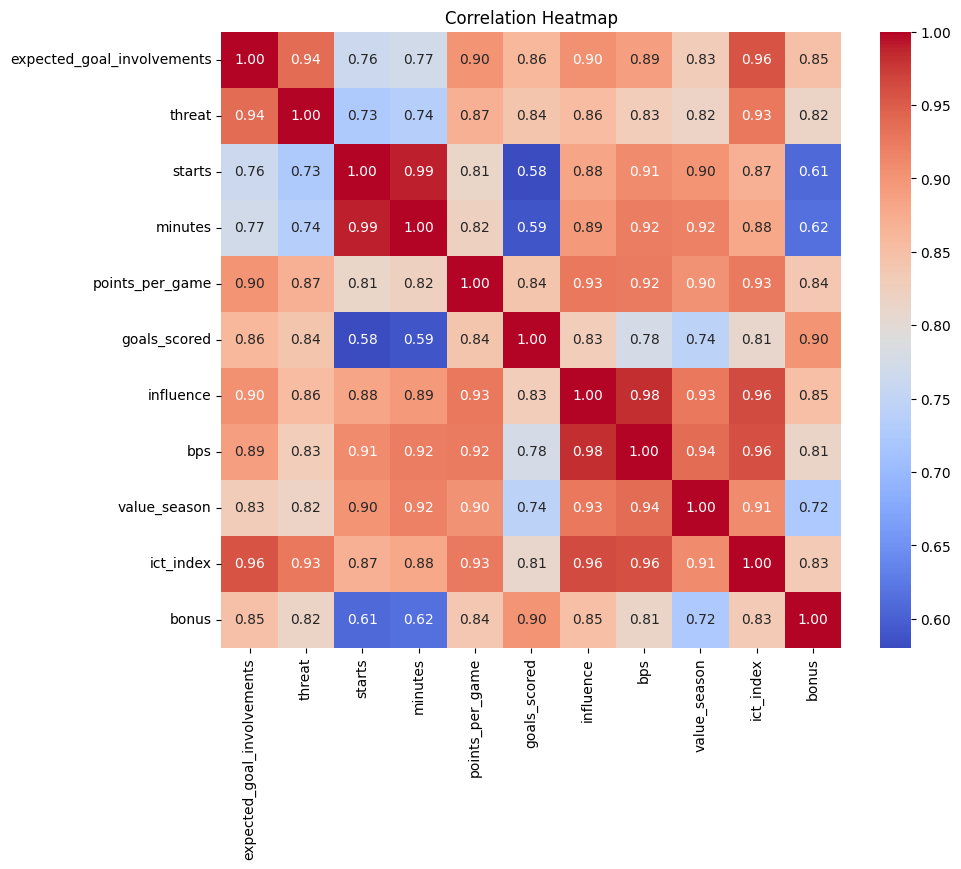

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(mid_features.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
mid_features

,expected_goal_involvements,threat,starts,minutes,points_per_game,goals_scored,influence,bps,value_season,ict_index,bonus
0,0.00,0.0,0,0,0.0,0,0.0,0,0.0,0.0,0
6,0.35,3.0,5,391,1.2,0,30.8,63,2.1,8.4,0
8,4.26,334.0,10,851,3.8,3,218.4,164,7.9,75.8,4
9,0.35,41.0,0,104,1.6,1,53.2,50,3.1,12.5,0
10,4.20,161.0,9,725,4.0,1,172.2,157,4.3,64.3,3
...,...,...,...,...,...,...,...,...,...,...,...
690,0.13,30.0,3,269,1.2,0,30.6,32,2.1,10.6,0
692,1.85,78.0,2,179,2.2,1,64.6,47,2.0,19.4,0
696,0.19,12.0,10,729,1.4,0,127.4,144,3.4,20.2,0
697,0.20,27.0,1,207,0.8,0,19.6,23,0.9,6.6,0


In [ ]:
columns = ['ict_index', 'bps', 'influence', 'starts']
mid_features.drop(columns = columns, inplace = True, axis =1 )

<ipython-input-114-9bbd033c6067>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_features.drop(columns = columns, inplace = True, axis =1 )


In [ ]:
mid_features.head()

,expected_goal_involvements,threat,minutes,points_per_game,goals_scored,value_season,bonus
0,0.00,0.0,0,0.0,0,0.0,0
6,0.35,3.0,391,1.2,0,2.1,0
8,4.26,334.0,851,3.8,3,7.9,4
9,0.35,41.0,104,1.6,1,3.1,0
10,4.20,161.0,725,4.0,1,4.3,3


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


X = mid_features
Y = mid['total_points']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=11)

# Preprocess the data (Standardizing the features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Get the formula with coefficients (same as before)
coefficients = model.coef_
print(coefficients)
formula = f"total_points = {model.intercept_:.4f} "
for i, feature in enumerate(mid_features):
    formula += f"+ ({coefficients[i]:.4f} * {feature}) "
print("\nFormula:", formula)


Mean Squared Error (MSE): 7.0748
R-squared (R²): 0.9889
[ 1.99289151 -0.0040723   0.00637339  2.64272974  1.72864392  2.00592589
  1.50214468]

Formula: total_points = -0.3695 + (1.9929 * expected_goal_involvements) + (-0.0041 * threat) + (0.0064 * minutes) + (2.6427 * points_per_game) + (1.7286 * goals_scored) + (2.0059 * value_season) + (1.5021 * bonus) 


In [ ]:
mid["score"] = (
    -0.1908 +
    (1.4458 * mid["expected_goal_involvements"]) +
    (0.0079 * mid["threat"]) +
    (0.0083 * mid["minutes"]) +
    (1.7548 * mid["points_per_game"]) +
    (1.3499 * mid["goals_scored"]) +
    (1.8410 * mid["value_season"]) +
    (1.5510 * mid["bonus"])
)

<ipython-input-117-9469d0c299a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid["score"] = (


In [ ]:
mid = mid.sort_values('score', ascending = False)
mid.head()

,id,name,now_cost,position,team,starts,penalties_missed,own_goals,ep_next,influence,...,selected_by_percent,expected_goals_conceded,creativity_rank,cost_change_event_fall,points_per_game,assists,starts_per_90,threat_rank_type,ict_index_rank,score
405,328,Mohamed Salah,13.4,MID,Liverpool,15,0,0,12.7,700.6,...,63.3,14.58,23,0,10.4,9,1.03,1,1,137.606486
213,182,Cole Palmer,11.1,MID,Chelsea,16,0,0,9.1,650.0,...,63.2,21.18,2,0,7.9,7,1.04,4,2,114.765640
116,99,Bryan Mbeumo,7.6,MID,Brentford,16,0,0,6.0,549.0,...,27.9,27.12,12,0,6.6,2,1.00,20,7,104.947020
13,17,Bukayo Saka,10.6,MID,Arsenal,15,0,0,8.8,516.2,...,44.4,9.78,1,0,7.1,11,1.08,3,3,91.474346
607,494,James Maddison,7.6,MID,Spurs,13,0,0,7.3,484.4,...,7.6,15.64,13,0,5.7,5,1.15,12,8,83.453226


## CB

In [ ]:
defender = df[df['position']=='DEF']
defender.head()

,id,name,now_cost,position,team,starts,penalties_missed,own_goals,ep_next,influence,...,saves_per_90,selected_by_percent,expected_goals_conceded,creativity_rank,cost_change_event_fall,points_per_game,assists,starts_per_90,threat_rank_type,ict_index_rank
2,3,Gabriel dos Santos Magalhães,6.1,DEF,Arsenal,14,0,0,5.8,340.0,...,0.0,23.0,12.59,202,1,4.9,1,1.07,3,81
5,6,Jurriën Timber,5.7,DEF,Arsenal,13,0,0,6.8,189.0,...,0.0,7.2,10.14,103,0,3.8,1,1.04,9,124
7,8,Jakub Kiwior,4.8,DEF,Arsenal,2,0,0,3.0,49.2,...,0.0,0.2,4.45,351,0,1.6,0,0.56,232,380
14,18,William Saliba,6.2,DEF,Arsenal,15,0,0,8.6,316.6,...,0.0,29.9,11.63,277,0,4.1,0,1.05,33,148
16,21,Kieran Tierney,4.3,DEF,Arsenal,0,0,0,1.0,0.0,...,0.0,0.0,0.00,547,0,0.0,0,0.00,205,559


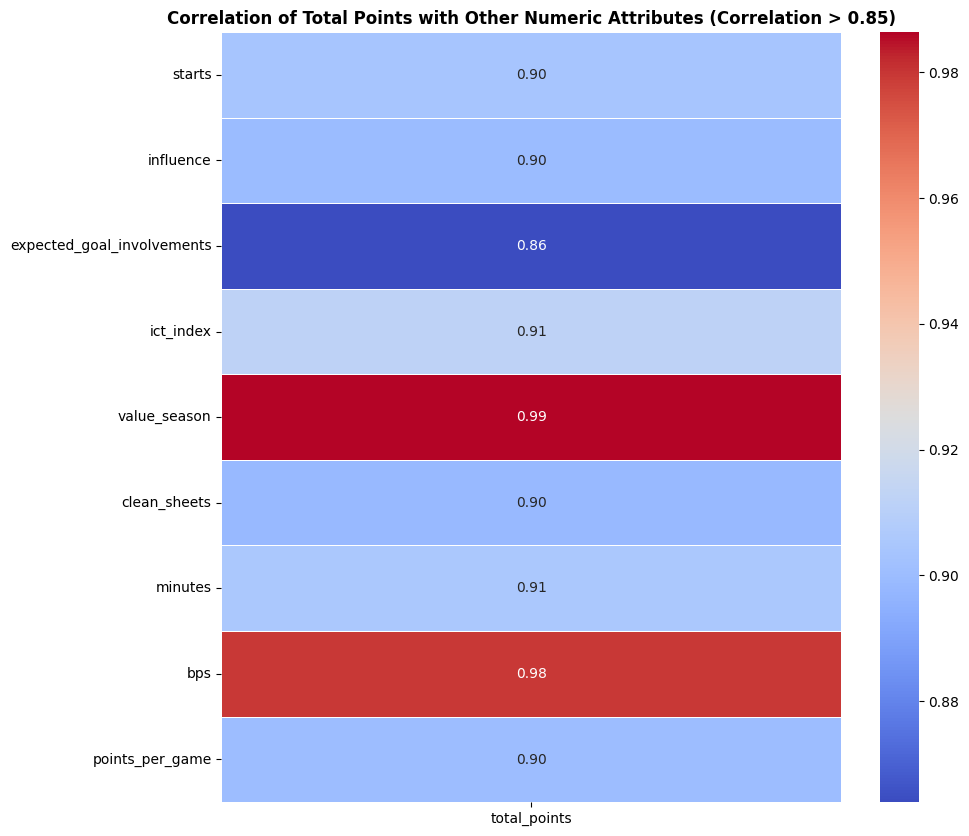

In [ ]:
numeric_defender = defender.select_dtypes(include=['float64', 'int64'])
#calclulate correlation total points with others
corr_matrix_defender = numeric_defender.corr()['total_points'].drop('total_points').to_frame()
# Filter the correlation matrix to keep only those correlations above 0.85 (absolute value)
filtered_correlation_matrix_defender = corr_matrix_defender[corr_matrix_defender['total_points'] > 0.85]

#plot
plt.figure(figsize=(10, 10))
sns.heatmap(filtered_correlation_matrix_defender, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation of Total Points with Other Numeric Attributes (Correlation > 0.85)', fontweight='bold')
plt.show()

In [ ]:
filtered_correlation_matrix_defender

,total_points
starts,0.903661
influence,0.899725
expected_goal_involvements,0.863951
ict_index,0.912061
value_season,0.986345
clean_sheets,0.898532
minutes,0.905492
bps,0.979592
points_per_game,0.899976


In [ ]:
important_features_def =[
'starts',
'minutes',
'points_per_game',
'influence',
'bps',
'value_season',
'clean_sheets',
'ict_index']

In [ ]:
def_features = defender[important_features_def]
def_features.head()


,starts,minutes,points_per_game,influence,bps,value_season,clean_sheets,ict_index
2,14,1178,4.9,340.0,244,11.3,5,64.8
5,13,1130,3.8,189.0,187,9.3,5,51.4
7,2,323,1.6,49.2,39,2.7,1,6.3
14,15,1289,4.1,316.6,254,9.8,6,45.4
16,0,0,0.0,0.0,0,0.0,0,0.0


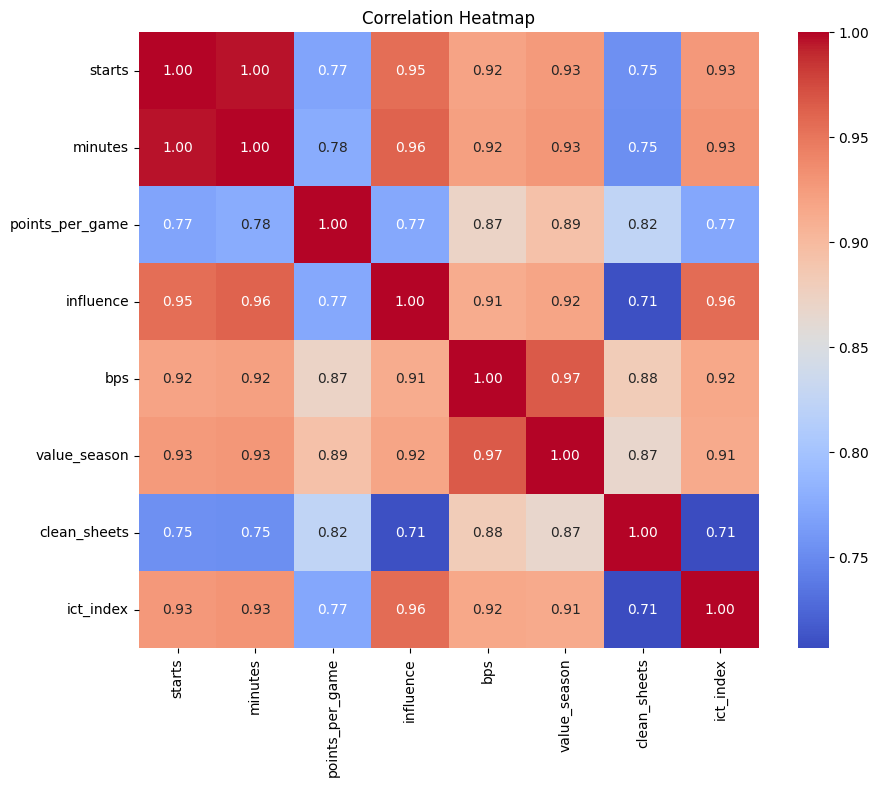

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(def_features.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
columns =['starts', 'influence', 'bps']
def_features.drop(columns= columns, inplace = True, axis=1)
def_features.head()

<ipython-input-125-d9cd7460c560>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def_features.drop(columns= columns, inplace = True, axis=1)


,minutes,points_per_game,value_season,clean_sheets,ict_index
2,1178,4.9,11.3,5,64.8
5,1130,3.8,9.3,5,51.4
7,323,1.6,2.7,1,6.3
14,1289,4.1,9.8,6,45.4
16,0,0.0,0.0,0,0.0


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


X = def_features
Y = defender['total_points']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=11)

# Preprocess the data (Standardizing the features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Get the formula with coefficients (same as before)
coefficients = model.coef_
print(coefficients)
formula = f"total_points = {model.intercept_:.4f} "
for i, feature in enumerate(def_features):
    formula += f"+ ({coefficients[i]:.4f} * {feature}) "
print("\nFormula:", formula)


Mean Squared Error (MSE): 9.2269
R-squared (R²): 0.9762
[-0.00487917  0.87947112  3.41589386  1.74056939  0.18541241]

Formula: total_points = -0.2547 + (-0.0049 * minutes) + (0.8795 * points_per_game) + (3.4159 * value_season) + (1.7406 * clean_sheets) + (0.1854 * ict_index) 


In [ ]:
defender["score"] = (
    -0.2889 +
    (-0.0049 * defender["minutes"]) +
    (0.8008 * defender["points_per_game"]) +
    (3.1476 * defender["value_season"]) +
    (2.2609 * defender["clean_sheets"]) +
    (0.1968 * defender["ict_index"])
)

<ipython-input-127-8c89d6362018>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defender["score"] = (


In [ ]:
defender = defender.sort_values('score', ascending=False)
defender.head()

,id,name,now_cost,position,team,starts,penalties_missed,own_goals,ep_next,influence,...,selected_by_percent,expected_goals_conceded,creativity_rank,cost_change_event_fall,points_per_game,assists,starts_per_90,threat_rank_type,ict_index_rank,score
282,238,Ashley Young,4.6,DEF,Everton,13,0,0,6.5,306.6,...,3.3,14.92,66,0,4.8,3,1.04,90,103,65.09176
608,495,Pedro Porro,5.6,DEF,Spurs,14,0,0,4.7,388.2,...,29.6,22.11,17,0,3.8,2,0.94,11,27,57.86772
548,573,Nikola Milenković,4.6,DEF,Nott'm Forest,15,0,0,4.6,291.2,...,2.2,16.28,270,-1,3.9,1,1.00,8,133,57.59396
2,3,Gabriel dos Santos Magalhães,6.1,DEF,Arsenal,14,0,0,5.8,340.0,...,23.0,12.59,202,1,4.9,1,1.07,3,81,57.48784
534,436,Murillo Santiago Costa dos Santos,4.6,DEF,Nott'm Forest,16,0,0,1.7,386.8,...,3.6,17.45,146,0,3.4,0,1.02,13,80,57.31886


# GK

In [ ]:
GK = df[df['position']=='GKP']
GK.head()

,id,name,now_cost,position,team,starts,penalties_missed,own_goals,ep_next,influence,...,saves_per_90,selected_by_percent,expected_goals_conceded,creativity_rank,cost_change_event_fall,points_per_game,assists,starts_per_90,threat_rank_type,ict_index_rank
4,5,Karl Hein,4.0,GKP,Arsenal,0,0,0,0.0,0.0,...,0.0,0.0,0.00,498,0,0.0,0,0.0,29,518
11,15,David Raya Martin,5.6,GKP,Arsenal,16,0,0,5.4,351.4,...,2.5,30.9,14.27,693,0,4.0,0,1.0,72,202
21,73,Norberto Murara Neto,4.2,GKP,Arsenal,2,0,0,1.0,77.8,...,5.5,0.9,2.91,534,0,3.5,0,1.0,37,362
27,639,Tommy Setford,4.5,GKP,Arsenal,0,0,0,1.0,0.0,...,0.0,0.0,0.00,636,0,0.0,0,0.0,59,641
44,39,Joe Gauci,4.0,GKP,Aston Villa,0,0,0,-1.0,0.0,...,0.0,0.8,0.00,497,0,0.0,0,0.0,28,517


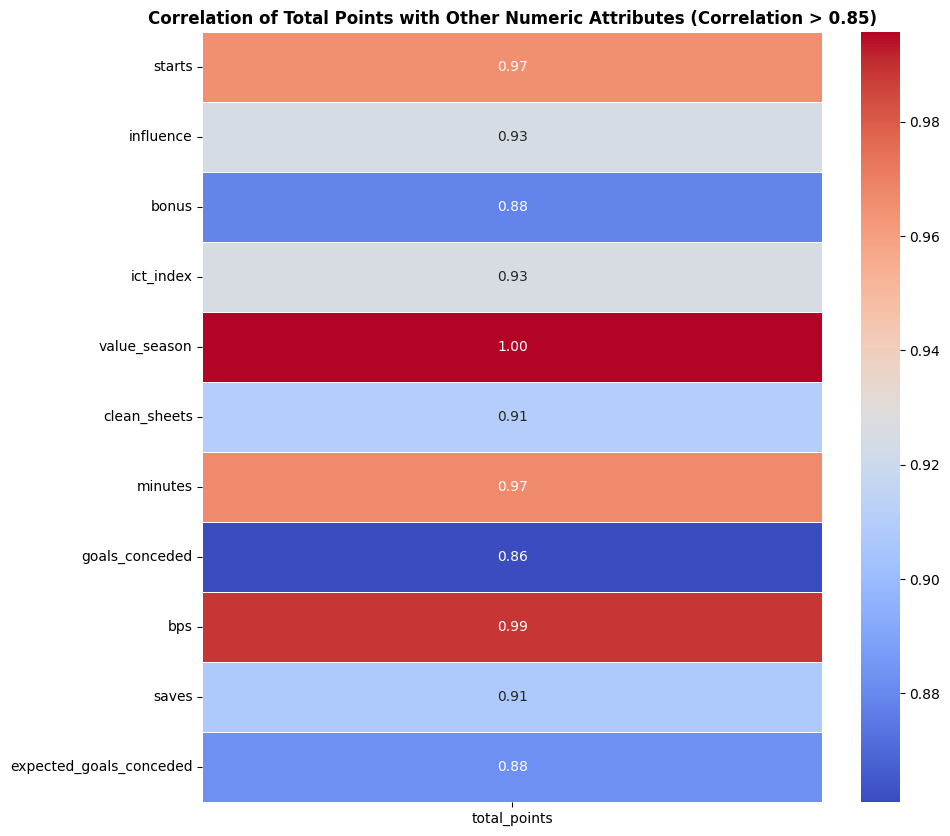

In [ ]:
numeric_GK = GK.select_dtypes(include=['float64', 'int64'])
#calulate correlation between total poitns and ohers
corr_matrix_GK = numeric_GK.corr()['total_points'].drop('total_points').to_frame()
#filter the corr to keep only high corr(0.85)
filtered_correlation_matrix_GK = corr_matrix_GK[corr_matrix_GK['total_points'] > 0.85]

#plot
plt.figure(figsize=(10, 10))
sns.heatmap(filtered_correlation_matrix_GK, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)


plt.title('Correlation of Total Points with Other Numeric Attributes (Correlation > 0.85)', fontweight='bold')
plt.show()



In [ ]:
filtered_correlation_matrix_GK

,total_points
starts,0.965181
influence,0.925057
bonus,0.878655
ict_index,0.925572
value_season,0.995645
clean_sheets,0.910172
minutes,0.966738
goals_conceded,0.861003
bps,0.988618
saves,0.907413


In [ ]:

features_GK = ['starts',
'goals_conceded',
'saves',
'expected_goals_conceded',
'minutes',
'points_per_game',
'influence',
'bps',
'value_season',
'clean_sheets',
'ict_index',
'bonus']


In [ ]:
gk_feat = GK[features_GK]

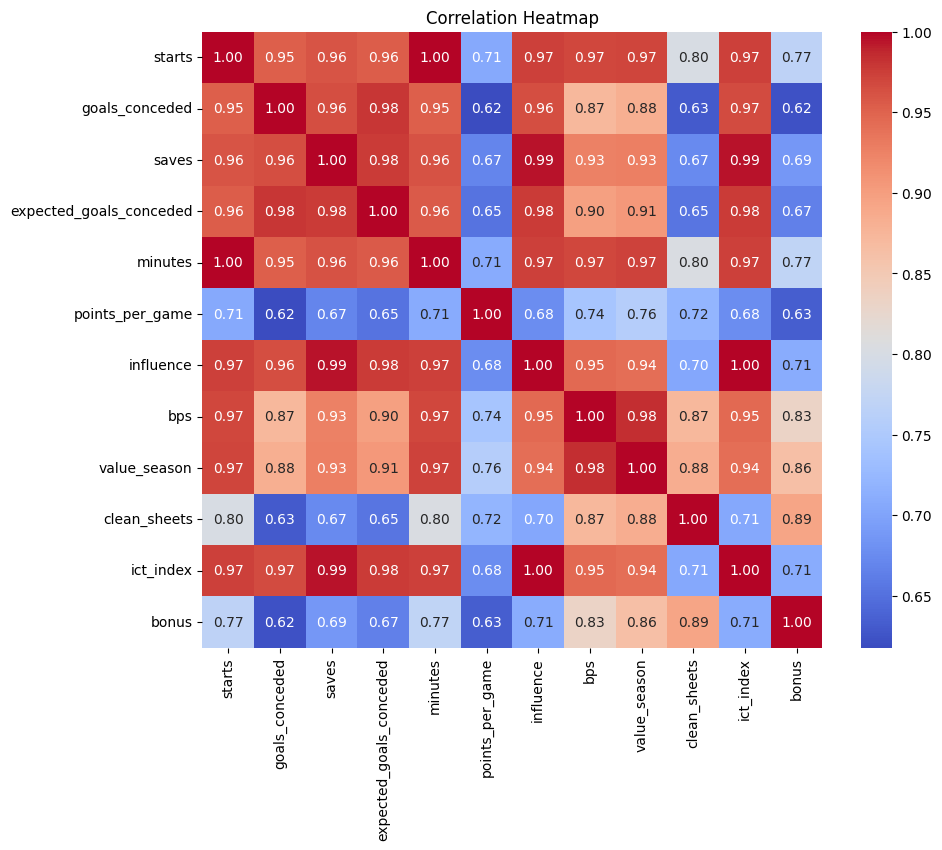

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(gk_feat.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
columns = ['ict_index','bps', 'influence', 'starts', 'goals_conceded']
gk_feat.drop( columns = columns, inplace=True, axis=1)
gk_feat.head()

<ipython-input-135-db98c588d301>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gk_feat.drop( columns = columns, inplace=True, axis=1)


,saves,expected_goals_conceded,minutes,points_per_game,value_season,clean_sheets,bonus
4,0,0.00,0,0.0,0.0,0,0
11,40,14.27,1440,4.0,11.4,6,6
21,11,2.91,180,3.5,1.7,0,0
27,0,0.00,0,0.0,0.0,0,0
44,0,0.00,0,0.0,0.0,0,0


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


X = gk_feat
Y = GK['total_points']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=11)

# Preprocess the data (Standardizing the features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Get the formula with coefficients (same as before)
coefficients = model.coef_
print(coefficients)
formula = f"total_points = {model.intercept_:.4f} "
for i, feature in enumerate(gk_feat):
    formula += f"+ ({coefficients[i]:.4f} * {feature}) "
print("\nFormula:", formula)


Mean Squared Error (MSE): 0.7706
R-squared (R²): 0.9978
[ 0.0941344  -0.24175089  0.01102808 -0.12609275  2.58022013  2.18236939
  0.81307976]

Formula: total_points = -0.0496 + (0.0941 * saves) + (-0.2418 * expected_goals_conceded) + (0.0110 * minutes) + (-0.1261 * points_per_game) + (2.5802 * value_season) + (2.1824 * clean_sheets) + (0.8131 * bonus) 


In [ ]:
GK["score"] = (
    -0.0290 +
    (0.0378 * GK["saves"]) +
    (-0.1731 * GK["expected_goals_conceded"]) +
    (0.0129 * GK["minutes"]) +
    (-0.3730 * GK["points_per_game"]) +
    (2.5588 * GK["value_season"]) +
    (2.0741 * GK["clean_sheets"]) +
    (1.0041 * GK["bonus"])
)


<ipython-input-137-3d8f5d8712fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GK["score"] = (


In [ ]:
GK =GK.sort_values('score', ascending=False)
GK.head()

,id,name,now_cost,position,team,starts,penalties_missed,own_goals,ep_next,influence,...,selected_by_percent,expected_goals_conceded,creativity_rank,cost_change_event_fall,points_per_game,assists,starts_per_90,threat_rank_type,ict_index_rank,score
279,235,Jordan Pickford,4.9,GKP,Everton,15,0,0,4.5,377.2,...,9.7,19.77,367,0,4.4,0,1.0,63,190,68.893613
541,443,Matz Sels,4.7,GKP,Nott'm Forest,16,0,0,2.8,357.2,...,8.0,17.50,449,0,4.0,1,1.0,61,198,66.883730
471,383,André Onana,5.2,GKP,Man Utd,16,0,0,2.8,365.0,...,9.7,23.26,354,0,4.2,0,1.0,69,192,64.977514
11,15,David Raya Martin,5.6,GKP,Arsenal,16,0,0,5.4,351.4,...,30.9,14.27,693,0,4.0,0,1.0,72,202,63.736383
237,201,Dean Henderson,4.4,GKP,Crystal Palace,16,0,0,2.8,419.4,...,10.6,22.13,555,0,3.4,0,1.0,1,163,57.599597


## Linear Programming


In [ ]:
df = pd.concat([GK, mid, defender, forwards], axis=0)
df.head()

,id,name,now_cost,position,team,starts,penalties_missed,own_goals,ep_next,influence,...,selected_by_percent,expected_goals_conceded,creativity_rank,cost_change_event_fall,points_per_game,assists,starts_per_90,threat_rank_type,ict_index_rank,score
279,235,Jordan Pickford,4.9,GKP,Everton,15,0,0,4.5,377.2,...,9.7,19.77,367,0,4.4,0,1.0,63,190,68.893613
541,443,Matz Sels,4.7,GKP,Nott'm Forest,16,0,0,2.8,357.2,...,8.0,17.50,449,0,4.0,1,1.0,61,198,66.883730
471,383,André Onana,5.2,GKP,Man Utd,16,0,0,2.8,365.0,...,9.7,23.26,354,0,4.2,0,1.0,69,192,64.977514
11,15,David Raya Martin,5.6,GKP,Arsenal,16,0,0,5.4,351.4,...,30.9,14.27,693,0,4.0,0,1.0,72,202,63.736383
237,201,Dean Henderson,4.4,GKP,Crystal Palace,16,0,0,2.8,419.4,...,10.6,22.13,555,0,3.4,0,1.0,1,163,57.599597


In [ ]:
!pip install -q pyomo
!apt-get install -y -qq glpk-utils

In [ ]:
import pyomo.environ as pyo
import pandas as pd
from collections import defaultdict



# Mapping position to indices (optional, for display only)
position_map = {"GKP": 0, "DEF": 1, "MID": 2, "FWD": 3}

# Group players by team
teams = df["team"].unique()
team_players = defaultdict(list)
for idx, row in df.iterrows():
    team_players[row["team"]].append(idx)  # Use DataFrame index for player IDs

# Model setup
model = pyo.ConcreteModel()
n_players = len(df)

# Decision variable: Binary (1 if player j is selected, 0 otherwise)
model.x = pyo.Var(range(n_players), domain=pyo.Binary)

# Objective function: Maximize total score
def Obj(model):
    return sum(df.loc[j, "score"] * model.x[j] for j in range(n_players))
model.obj = pyo.Objective(rule=Obj, sense=pyo.maximize)

# Constraint 1: Exactly 11 players must be selected
def Co1(model):
    return sum(model.x[j] for j in range(n_players)) == num_players
model.Co1 = pyo.Constraint(rule=Co1)

# Constraint 2: Budget ≤ 83.4
def Co2(model):
    return sum(df.loc[j, "now_cost"] * model.x[j] for j in range(n_players)) <= budget
model.Co2 = pyo.Constraint(rule=Co2)

# Constraint 3: Position-specific limits
position_limits = {"GKP": (1, 1), "DEF": (3, 5), "MID": (3, 5), "FWD": (1, 3)}
for position, (min_limit, max_limit) in position_limits.items():
    # Get indices of players in this position
    position_players = df[df["position"] == position].index.tolist()
    model.add_component(
        f"Min_{position}",
        pyo.Constraint(expr=sum(model.x[j] for j in position_players) >= min_limit)
    )
    model.add_component(
        f"Max_{position}",
        pyo.Constraint(expr=sum(model.x[j] for j in position_players) <= max_limit)
    )

# Constraint 4: Maximum 3 players per team
for team in teams:
    model.add_component(
        f"Max_Team_{team}",
        pyo.Constraint(expr=sum(model.x[j] for j in team_players[team]) <= 3)
    )

# Solve the model
solver = pyo.SolverFactory("glpk")  # Ensure GLPK is installed
solver.solve(model)

# Display selected players
selected_players = []
for j in range(n_players):
    if pyo.value(model.x[j]) > 0.5:  # Player is selected
        selected_players.append(df.loc[j, ["name", "position", "score", "now_cost"]])

# Convert to DataFrame for clean display
selected_df = pd.DataFrame(selected_players)
print(selected_df)


                                  name position       score  now_cost
13                         Bukayo Saka      MID   91.474346      10.6
116                       Bryan Mbeumo      MID  104.947020       7.6
211                    Nicolas Jackson      FWD   87.236665       8.2
213                        Cole Palmer      MID  114.765640      11.1
279                    Jordan Pickford      GKP   68.893613       4.9
282                       Ashley Young      DEF   65.091760       4.6
405                      Mohamed Salah      MID  137.606486      13.4
534  Murillo Santiago Costa dos Santos      DEF   57.318860       4.6
544                         Chris Wood      FWD   87.589754       6.6
548                  Nikola Milenković      DEF   57.593960       4.6
669   Matheus Santos Carneiro Da Cunha      FWD   89.205232       7.1
